<img src="https://jupyter.org/assets/main-logo.svg" heigt=60> <font size="14" color=grey>  DHI Campus - Jupyter Training</font>  

***

# Module 3: Advanced Visualization

**Learning Goals:**

+ Knows how to create fast plots with pandas (dataframe plot function)
+ Knows how to plot with matplotlib
+ Knows different type of plots (Plot, Scatter, Histogram, Bar) and when to use them
+ Knows how to format plots (annotations and legends)
+ Knows geopandas for working with geospatial data (ArcGIS supplement)
+ Can save plots to files (png, svg)

Knows pip and conda installation and differences between them

**Pre-Reading**
+ read about matplotlib (https://matplotlib.org)
+ read about geopandas (https://pypi.org/project/geopandas/ )
+ have some spatial data (shape-files) ready

**Facilitation**

Follow the provided Excel-Spreadsheet for timing!

+ Reception, Welcome, Meet&Greet, Icebreaker
+ continue with Notebook below

***
**Attention Instructor**: Start of Students Notebook
***

## Geopandas

Geopandas adds a spatial relation to a DataFrame, which then becomes a GeoDataFrame.
In addition to the index-column, a GeoDataFrame has a geometry column that contains a geometry (points, line, polygon). Note that GeoPandas is 2D. 

###   Accessing shp-files

If you know how a shape file looks like from the inside, you know what a GeoDataFrame is:

In [1]:
import geopandas as gpd
gdf_isolines = gpd.read_file("../data/isolines_final_head.shp")
print(gdf_isolines)

    ISOLINE      F                                           geometry
0         1  471.0  (LINESTRING (521940.6621430938 7501088.7663182...
1         2  479.0  (LINESTRING (520247.3947480742 7499799.998496,...
2         3  469.0  LINESTRING (523666.8945649688 7500890.26766103...
3         4  467.0  LINESTRING (523680.7471040313 7500890.91719717...
4         5  483.0  LINESTRING (519300.000522 7500615.815573636, 5...
5         6  473.0  (LINESTRING (521971.1164887969 7501062.3994969...
6         7  477.0  (LINESTRING (520882.8800386016 7499799.998496,...
7         8  480.0  (LINESTRING (520130.2013886992 7499799.998496,...
8         9  481.0  (LINESTRING (519976.0978120391 7499799.998496,...
9        10  470.0  LINESTRING (523660.0625337188 7500888.29830068...
10       11  468.0  LINESTRING (523673.8208345 7500890.59249014, 5...
11       12  474.0  (LINESTRING (521986.3435395781 7501049.2161473...
12       13  482.0  LINESTRING (519685.8054536406 7499799.998496, ...
13       14  475.0  

this is not very pretty - the actual idea with a GeoDataFrame is to show it on a map: 

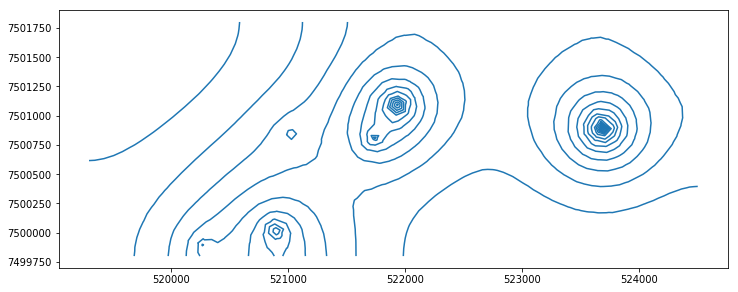

In [2]:
%matplotlib inline
gdf_isolines.plot(figsize=(12,6))


###  Spatial Selection

Where DataFrames allows slicing by value (`DataFrame.loc`) or index (`DataFrame.iloc`), a GeoDataFrame adds spatial slicing (`GeoDataFrame.cx`) to choose elements in a certain range of x- and y- coordinates.

For more complex spatial selections see http://geopandas.org/set_operations.html how to use overlays and set operations.

In [3]:
# select all elements with 521000 < x < 523000
gdf_elements.cx[521000:523000,:].plot()

NameError: name 'gdf_elements' is not defined

###  Coordinate Transformation

Geopandas makes coordinate transformation easy. it uses 

uses Proj4 to define and operation on coordinate reference systems (CRS).

In [14]:
# by default, a geodataframe is crs-agnostic (unless you load it from a shape-file with .prj file).
gdf_isolines.crs

{}

In [15]:
# the crs can be defined by using a proj4 string
gdf_isolines.crs = {'init' :'epsg:25832'} # Lat-Lon code

Check out https://spatialreference.org/ref/epsg/wgs-84/ for more information on coordinate definitions

In [16]:
# finally, the geodataframe can be transformed to a different CRS.
gdf_isolines.to_crs({'init' :'epsg:4326'})

,ISOLINE,F,geometry
0,1,471.0,(LINESTRING (9.516481783420002 67.624472778915...
1,2,479.0,(LINESTRING (9.476390915305261 67.613034973124...
2,3,469.0,LINESTRING (9.557072886180718 67.6225582388936...
3,4,467.0,LINESTRING (9.557399066590694 67.6225629473661...
4,5,483.0,LINESTRING (9.454241743366293 67.6204162203546...
5,6,473.0,(LINESTRING (9.51719345997736 67.6242340064223...
6,7,477.0,(LINESTRING (9.491342264143935 67.612990463589...
7,8,480.0,(LINESTRING (9.473633647692573 67.613043031175...
8,9,481.0,(LINESTRING (9.470007971579824 67.613053555932...
9,10,470.0,LINESTRING (9.556911666160035 67.6225411259410...


### Dissolve

Dissolve merges features of the same kind (given by a column name), into one feature. This is useful to reduce the number of features, e.g. by finite-elements into parameter zones.

To combine all features in a GeoDataFrame, first set a dummy attribute and dissolve by it.

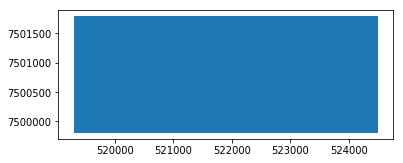

In [31]:
gdf_elements["dummy"] = 0
gdf_elements.dissolve(by="dummy").plot()

### Other useful commands

Below are a few more useful commands. 

See the GeoPandasDocumentation http://geopandas.org for a complete list of operations.

In [32]:
# area of all elements
gdf_elements.area.sum()

10400013.390373893

In [33]:
# bounding box
gdf_elements.total_bounds

array([ 519300.000522  , 7499799.998496  ,  524500.00333791,
       7501800.001401  ])

In [34]:
# distance between obs point 0 and 1:
gdf_obs.geometry[0].distance(gdf_obs.geometry[1])

1990.2472543293798

## Matplotlib
###  Time Series (pandas and standard)

We have already learned the pandas way. This is good for quick typing:

In [17]:
df_pivot.plot()

NameError: name 'df_pivot' is not defined

Using the matplotlib gives you more control over the plot.

First we import matplotlib and make Jupyter to plot its output inline with the magic `%matplotlib inline` command. 
(Yes, we had alredy done this above, but I show it a second time because it is important)

In [36]:
%matplotlib inline  
import matplotlib.pyplot as plt

then we do the same command again in a matplotlib-style

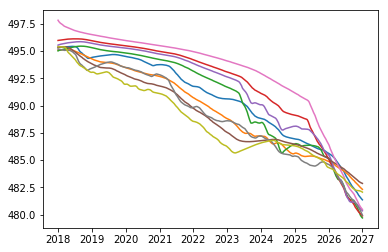

In [37]:
_ = plt.plot(df_pivot)  # _ is a dummy variable, to keep the output clean

this looks the same (without the automatic legend). The reason to do it this way is to get more control over the plot, e.g. by choosing your own labels instead of the column names:

[]

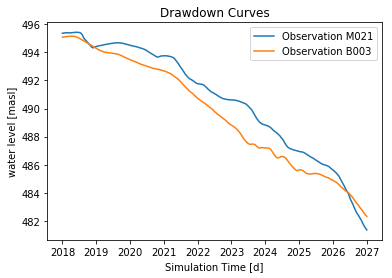

In [38]:
plt.plot(df_pivot.index, df_pivot.MB11BSSM021, label="Observation M021")  # plot and choose label
plt.plot(df_pivot.index, df_pivot.MB13BS4B003, label="Observation B003")  # plot and choose label
plt.legend()  # activate legend, now using the labels we chose
plt.xlabel("Simulation Time [d]")  # set x-label
plt.ylabel("water level [masl]")  # set y-label
plt.title("Drawdown Curves")  # set title
plt.plot()  # finally, create the plot

###  Scatter

Scatter plots are the workhorse for comparing to data sets, like model-to-measurement misfit.
in this case, we compare the behavior of two different observation points.

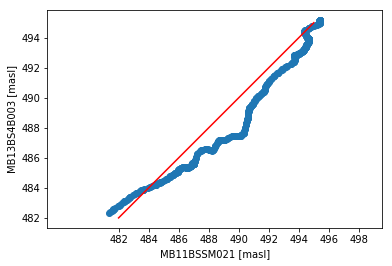

In [39]:
plt.scatter(df_pivot.MB11BSSM021, df_pivot.MB13BS4B003)
plt.xlabel("MB11BSSM021 [masl]")  # set x-label
plt.ylabel("MB13BS4B003 [masl]")  # set y-label

plt.xticks(range(482, 500, 2))  # set ticks on x-axis
plt.yticks(range(482, 500, 2))  # set ticks on y-axis
plt.axis("equal")  # set equal scale to x- and y-axis

plt.plot([482,495],[482,495],"r")  # add  bisecting line


###  Histogram (including output)

Histograms are a useful expression of frequency distribution.
Besides plotting the distribution to screen, the `plt.hist()` method also returns the contents of the histogram for further processing.


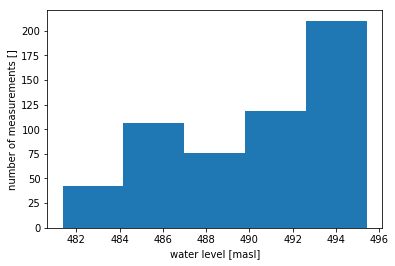

In [40]:
n, bins, patches  = plt.hist(df_pivot.MB11BSSM021, bins=5)
plt.xlabel("water level [masl]")
plt.ylabel("number of measurements []")
plt.show()

In [41]:
# list of bins and frequency 
zip(bins, n)

[(481.3574523925781, 42.0),
 (484.1718688964844, 106.0),
 (486.9862854003906, 76.0),
 (489.8007019042969, 118.0),
 (492.6151184082031, 210.0)]

###  Layouting (chart elements, multiple axes / figures)

Multiple figures are often desired. The matplotlib allows different ways, a simple and common one is the usage of the `plt.subplots()` method.
The example returns a `Figure` and a tuple of `Axis`. 

A subsequent plotting command is then done on the axis (e.g. `ax.plot()` instead of `plt.plot()`).

The axis can also provided to a pandas-plot.

Text(0.5,0,'Water Level [masl]')

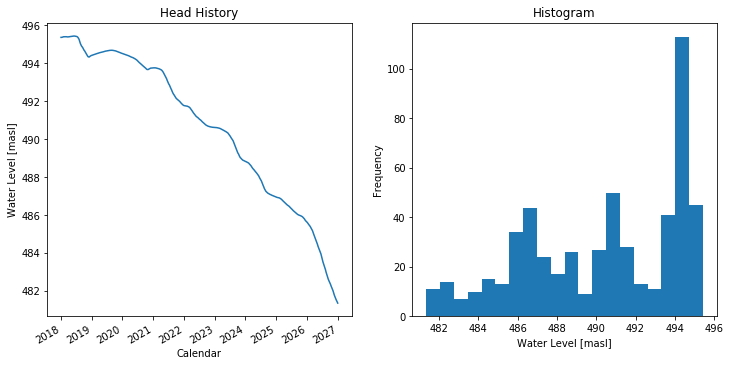

In [42]:
# create a figure with two subplot (1 row, 2 columns), and specify a 12 by 6 inch large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# use pandas to show simulated values as plot on left windows (axis 1) and histogram on right (axis 2)
df_pivot.MB11BSSM021.plot(ax=ax1)
df_pivot.MB11BSSM021.plot.hist(bins=20, ax=ax2)

# set title and labels to corresponding subplot, addressing the axis again:
ax1.set_title("Head History")
ax1.set_ylabel("Water Level [masl]")

ax2.set_title("Histogram")
ax2.set_xlabel("Water Level [masl]")

### More Options

The matplotlib gallery shows a number of examples of further visualization style, including ready-to-use source codes:


https://matplotlib.org/gallery.html

###  Saving files

Matplotlib is meant to create publishing-quality images. Once you are happy with your figure, issue the `plt.savefig()` command **before** the `plt.plot()` command to export the image. Recommended image format is PNG.

[]

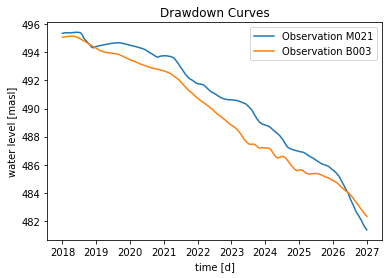

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline  
# the magic command is important!

plt.plot(df_pivot.index, df_pivot.MB11BSSM021, label="Observation M021")
plt.plot(df_pivot.index, df_pivot.MB13BS4B003, label="Observation B003")
plt.xlabel("time [d]")
plt.ylabel("water level [masl]")
plt.title("Drawdown Curves")
plt.legend()

plt.savefig("timeseries.png")
plt.plot()

###  Creating Animations

Animations are an excellent way to screen the results of transient models. 
This example creates an animation of the transient water development of a FEFLOW model.
(A similar movie could be exported from within FEFLOW using the autopilot panel).

We load the model first and plot an example figure.

In [44]:
# load FEFLOW model
try:
    doc = ifm.loadDocument("./example_data/Pit3_cal2-highres.dac")
except StandardError as e:
    print("/example_data/Pit3_cal2-highres.dac not found!")
    print("run ./example_data/Pit3_cal2-highres.fem first to create it!")

In [45]:
import numpy as np

# read node coordinates and incidence matric
x, y, imat = read_feflowmesh(doc)

# Get nodal head values from FEFLOW
def get_nodal_head_values(pdoc):
    if doc.getNumberOfDimensions() == 2:
        nn = doc.getNumberOfNodes()
    else:
        nn = doc.getNumberOfNodesPerSlice()
        
    h = [doc.getResultsFlowHeadValue(n) for n in range(nn)]   
    h = np.array(h)
    
    #replace nan heads (inactive nodes) with mean value
    inds = np.where(np.isnan(h))
    h_mean = h[~np.isnan(h)].mean()
    for i in inds:
        h[i] = h_mean
    
    return h

h = get_nodal_head_values(doc)

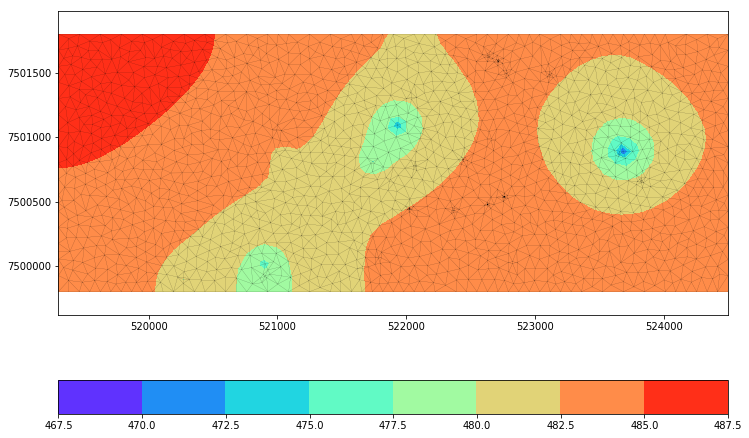

In [46]:
# do contouring in matplotlib
fig, ax = plt.subplots(figsize=(12,8))
plt.axis('equal')

# matplotlib for contouring on triangle mesh
import matplotlib.tri as tri

femesh = tri.Triangulation(x,y,np.asarray(imat))
plt.triplot(femesh, lw=0.1, c='k')
plt.tricontourf(femesh, h, cmap='rainbow')
plt.colorbar(orientation='horizontal')

next, we create an animation writer to create a FFMPeg Movie File with a Framerate of 4 fps (this rather low vaue slows down the animation when showing the limited numer of time steps in the dac file).
The dac uses constant time steps too make this example easier.


In [47]:
# https://matplotlib.org/examples/animation/moviewriter.html
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# initialize the writer
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=4)

Finally, we step through the time steps of the dac, recreating the image each time. The `.grab_frame()` method adds the current image as the next frame to the movie. Upon termination, the writer saves the file.

In [ ]:
# render one image per time step
with writer.saving(fig, "writer_FEFLOW.mp4", fig.dpi):
    for i, t, dt in doc.getTimeSteps():
        print("TS # {}/{}: {}".format(i, doc.getNumberOfTimeSteps(), t))
        doc.loadTimeStep(i)        
        h = get_nodal_head_values(doc)
        
        # clear and replot figure
        ax.clear()
        ax.triplot(femesh, lw=0.1, c='k')
        ax.tricontourf(femesh, h, cmap='rainbow')
        
        # add fiure as frame to animation
        writer.grab_frame()